### This file is for testing a duckdb solution

In [1]:
# ChatGPT Example

import duckdb
import pandas as pd
import psycopg2

# PostgreSQL Connection Details
PG_CONN = "dbname='mydb' user='myuser' password='mypassword' host='localhost' port='5432'"

# Connect DuckDB to PostgreSQL
con = duckdb.connect()
con.execute(f"INSTALL postgres; LOAD postgres;")

# Register PostgreSQL table in DuckDB (Lazy Loading)
con.execute(f"""
    CREATE VIEW my_data AS 
    SELECT * FROM postgres_scan('{PG_CONN}', 'public.my_table')
""")


from sklearn.cluster import KMeans
import numpy as np

# Custom clustering function
def cluster_price(value):
    return "Low" if value < 250 else "High"

# Register the UDF in DuckDB
con.create_function("Cluster", cluster_price, returns="VARCHAR")

# Query PostgreSQL data with transformation applied dynamically
result = con.execute("SELECT id, price, Cluster(price) AS price_cluster FROM my_data").fetchdf()

print(result)

# Load data from PostgreSQL into Pandas
df = con.execute("SELECT price FROM my_data").fetchdf()

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[['price']])

# Register the result dynamically in DuckDB
con.register('clustered_df', df)

# Query with the new cluster information
result = con.execute("SELECT * FROM clustered_df").fetchdf()
print(result)



ParserException: Parser Error: syntax error at or near "mydb"

[
  [
    1200.5,
    899.99,
    499,
    199.99,
    149.99,
    399.99,
    299.99,
    89.99,
    49.99,
    179.99
  ]
]
      clts
0  1200.50
1   899.99
2   499.00
3   199.99
4   149.99
5   399.99
6   299.99
7    89.99
8    49.99
9   179.99


/tmp/ipykernel_67696/2108598865.py:21: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.
  con.create_function("Cluster", cluster_price, [float,float], float, type='arrow')


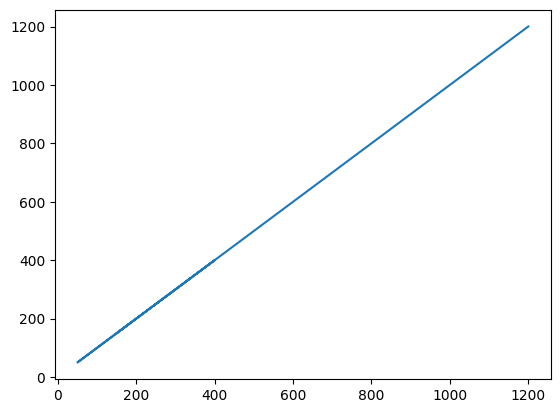

In [ ]:
import duckdb
import duckdb.typing
import pandas as pd
import psycopg2

PG_CONN = 'host=localhost port=5432 user=postgres password=password dbname=example'

con = duckdb.connect()
con.execute(f"INSTALL postgres_scanner; LOAD postgres_scanner; CALL postgres_attach('{PG_CONN}')")

from visualizations import Visualization

vis = Visualization()

def cluster_price(value, teste="TestingString"):
    print(value)
    vis.lineplot(value,value)
    return value

from typing import Union
con.create_function("Cluster", cluster_price, [float,float], float, type='arrow')

result = con.execute("WITH teste as (SELECT id, Cluster(price,price) as clts from products) SELECT clts from teste;").fetchdf()
print(result)




In [ ]:
import duckdb
import duckdb.typing
import pandas as pd
import psycopg2

PG_CONN = 'host=localhost port=5432 user=postgres password=password dbname=example'

con = duckdb.connect()
con.execute(f"INSTALL postgres_scanner; LOAD postgres_scanner; CALL postgres_attach('{PG_CONN}')")

from ml import MachineLearning

ml_class = MachineLearning()

def cluster_price(value: list) -> float:
    print(value)
    res = ml_class.cluster_kmeans(value)
    return res

from typing import Union
from duckdb.typing import DuckDBPyType
from pyarrow import types
# Dinamizar para que primeiro ele leia a query pra saber os tipos??

con.create_function("Cluster", cluster_price, [float, float], float, type="arrow")

result = con.execute("WITH teste as (SELECT Cluster(price, price) as clts from products) SELECT clts from teste;").fetchdf()
print(result)

# Maybe with map??



InvalidInputException: Invalid Input Error: 2 types provided, but the provided function takes 1 parameters

# The following notebook is the main solution using DuckDB

In [ ]:
!pip install sqlparse

  Using cached sqlparse-0.5.3-py3-none-any.whl.metadata (3.9 kB)
Using cached sqlparse-0.5.3-py3-none-any.whl (44 kB)


In [ ]:
from duck_solution import EngineDuck

engine = EngineDuck(host='localhost',port='5432',name='postgres',user='postgres',password='password')
engine.registerAllVisualizeFunctions()
engine.registerAllMlFunctions()
engine.registerAllSimilarityFunctions()


In [ ]:
engine.runQuery(""" 
WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
) SELECT WORDCLOUD(word) FROM findEvent;
""")

WORDCLOUD(word)
 
WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
) SELECT WORDCLOUD(array_agg(word)) FROM findEvent;


InvalidInputException: Invalid Input Error: Python exception occurred while executing the UDF: ArrowNotImplementedError: Function 'utf8_split_whitespace' has no kernel matching input types (list<l: string>)

At:
  pyarrow/error.pxi(92): pyarrow.lib.check_status


HBAR(wordToken, total)
 

WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
), countWords AS ( 
    SELECT regexp_split_to_table(word, ' ') AS wordToken FROM findEvent
), frequency as (
    SELECT wordToken, COUNT(*) as total FROM countWords GROUP BY wordToken
)
SELECT HBAR(array_agg(wordToken), array_agg(total)) from frequency 


['Island', 'Biden', 'Candidates', 'The', 'Senate', 'Key', 'Is', 'House', 'In', 'Renewed', 'Rhode', 'Scott', 'GOP', 'Joe', 'Struggling', 'Ballot', 'Sen.', 'National', 'On', 'Tim', 'Urges', 'Unity', 'Speech', '‘Cancer', 'Over', 'Primary', 'Moonshot’', 'Electability', 'Downplays', 'Concerns']
[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]
<class 'list'>
<class 'list'>
é depois do barh
 eh antes do return 


,"hbar(array_agg(wordToken), array_agg(total))"
0,1.0


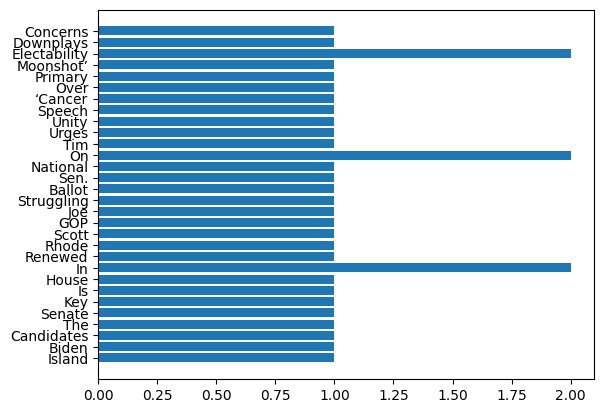

In [ ]:
engine.runQuery(""" 

WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
), countWords AS ( 
    SELECT regexp_split_to_table(word, ' ') AS wordToken FROM findEvent
), frequency as (
    SELECT wordToken, COUNT(*) as total FROM countWords GROUP BY wordToken
)
SELECT HBAR(wordToken, total) from frequency 

""")

In [ ]:
# Testing without array_agg

engine.runQuery(""" 

WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
), countWords AS ( 
    SELECT regexp_split_to_table(word, ' ') AS wordToken FROM findEvent
), frequency as (
    SELECT wordToken, COUNT(*) as total FROM countWords GROUP BY wordToken
)
SELECT HBAR(array_agg(wordToken), array_agg(total)) from frequency 

""")

In [ ]:
[True]*10

[True, True, True, True, True, True, True, True, True, True]

### Testing similarity stuff

In [ ]:
import duckdb
import duckdb.typing
import pandas as pd
import psycopg2

PG_CONN = 'host=localhost port=5432 user=postgres password=password dbname=example'

con = duckdb.connect()
con.execute(f"INSTALL postgres_scanner; LOAD postgres_scanner; CALL postgres_attach('{PG_CONN}')")

from ml import MachineLearning

ml_class = MachineLearning()

def cluster_price(*args) -> float:
    res = ml_class.cluster_kmeans(*args)
    print(res)
    return res

from typing import Union
from duckdb.typing import DuckDBPyType
from pyarrow import types
# Dinamizar para que primeiro ele leia a query pra saber os tipos??

con.create_function("Cluster", cluster_price, parameters=None, return_type=float, type="arrow")
# YAYYYYY THIS WORKS!! eu posso passar como LISTA INDIVIDUAL MESMO, cada row vai ser um [rowA1, rowB1], [rowA2]
result = con.execute("WITH teste as (SELECT Cluster(k,price, price) as clts from products) SELECT clts from teste;").fetchdf()
print(result)

# Maybe with map??

# eu posso definir e nao fazer um check, no maximo type check, mas order check nao

# ainda tenho que checar como vai ficar a chunkedarray no caso do hbar por ex

BinderException: Binder Error: column "price" must appear in the GROUP BY clause or must be part of an aggregate function.
Either add it to the GROUP BY list, or use "ANY_VALUE(price)" if the exact value of "price" is not important.

LINE 1: WITH teste as (SELECT Cluster(3, array_agg(price), price) as clts from products) SELECT clts from teste;
                                                           ^

In [ ]:
engine.runQuery("""
                 
WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
) SELECT word from findEvent;
""")

# THIS KINDA WORKS!!! THE PROBABLE CAUSE IS THE CHUNKED ARRAY BIT

,word
0,Joe Biden Urges National Unity In Speech On Re...
1,Sen. Tim Scott Downplays Electability Concerns...
2,Electability Is On The Ballot In Key Rhode Isl...


In [ ]:
import duckdb
import duckdb.typing
import pandas as pd
import psycopg2

PG_CONN = 'host=localhost port=5432 user=postgres password=password dbname=latlong'

con = duckdb.connect()
con.execute(f"INSTALL postgres_scanner; LOAD postgres_scanner; CALL postgres_attach('{PG_CONN}')")

from similarity_func import Similarity

sim = Similarity()

def range_sim(*args):
    rng = sim.rangeSim(*args)

    return rng

from typing import Union
from duckdb.typing import DuckDBPyType
from pyarrow import types
# Dinamizar para que primeiro ele leia a query pra saber os tipos??

from typing import Union



con.create_function("RANGESIM", range_sim, parameters=None, return_type=bool, type="arrow")


# YAYYYYY THIS WORKS!! eu posso passar como LISTA INDIVIDUAL MESMO, cada row vai ser um [rowA1, rowB1], [rowA2]
""" 
"""

result = con.execute(""" 
WITH center as (SELECT latitude as latCenter,longitude as longCenter from CITIES where city_name = 'Maceió'),
attrib as (SELECT latitude as latAttrib, longitude as longAttrib from cities where city_name != 'Maceió'), rn AS (
SELECT RANGESIM('haversine', 200, [latCenter, longCenter], [latAttrib, longAttrib]) as teste FROM center, attrib) SELECT teste from rn;
""").fetchdf()
print(result)

# talvez retornar o id??

# con.create_function("RANGE", lambda func, radius, center, attrib: self.sim.rangeSim(func, radius, center, attrib), parameters=None, return_type=float, type="arrow")
# Maybe with map??

# eu posso definir e nao fazer um check, no maximo type check, mas order check nao

# ainda tenho que checar como vai ficar a chunkedarray no caso do hbar por ex

# falta ajustar para quando for um tamanho menor..

# testar para ver como que fica em questão de tabela, se eu quiser usar dentro de um CTE por ex

# Posso checar individualmente se a distancia é menor, caso for, retorne um True. Caso nao seja, retorne False. A partir dai eu posso usar o WHERE RANGE(150)  !!!!!!!!!!!


[101.8847810188468, 102.61175347355551, 24.57270874779627, 115.57967280175875, 64.75658426456313, 42.053387352221456, 165.46117296526407, 62.11346253140686, 84.49545073400142]
result
[True, True, True, True, True, True, True, True, True]
   teste
0   True
1   True
2   True
3   True
4   True
5   True
6   True
7   True
8   True


In [ ]:
a = [30, 50, 20]

# Enumerar a lista 'a' a partir do índice 1
enumerated_list = list(enumerate(a, start=1))
print(enumerated_list)
# Ordenar a lista enumerada com base no valor (segundo elemento de cada tupla)
sorted_enumerated_list = sorted(enumerated_list, key=lambda x: x[1], reverse=True)

# Extrair os índices ordenados
indices_ordenados = [indice for indice, valor in sorted_enumerated_list]

print(indices_ordenados)


[(1, 30), (2, 50), (3, 20)]
[3, 1, 2]


In [ ]:
entrada = [50, 70, 60]

# Obter a lista de índices ordenados
indices_ordenados = [indice for indice, valor in sorted(enumerate(entrada, start=1), key=lambda x: x[1])]

print(indices_ordenados)


[1, 3, 2]


### Testing with queries

In [ ]:
from duck_solution import EngineDuck

engine = EngineDuck(host='localhost',port='5432',name='postgres',user='postgres',password='password')
engine.registerAllVisualizeFunctions()
engine.registerAllMlFunctions()
engine.registerAllSimilarityFunctions()

engine.runQuery(""" 
WITH
ny AS ( 
    SELECT latitude AS latNY, longitude AS longNY
    FROM location 
    WHERE city = 'New York'
), 
cities as (SELECT latitude as latCities, longitude as longCities from location WHERE city != 'New York' LIMIT 10),
aroundNY AS ( 
    SELECT city, latitude, longitude, numberNegativeNews, numberPositiveNews, month
    FROM ny, event e, location l, date d
    WHERE e.locationID = l.locationID AND e.dateID = d.dateID AND RANGE('haversine', 100000, [latNY, longNY], [latitude, longitude])), cluster AS (SELECT CLUSTER_KMEANS(3, latitude, longitude, numbernegativenews) as clt FROM aroundNY)
    SELECT SCATTER(latitude, longitude, CLUSTER_KMEANS(3, latitude, longitude, numbernegativenews)) from aroundNY 
""")

 
WITH
ny AS (
    SELECT latitude AS latNY, longitude AS longNY
    FROM location
    WHERE city = 'New York'
),
cities AS (
    SELECT latitude AS latCities, longitude AS longCities
    FROM location
    WHERE city != 'New York'
    LIMIT 10
),
aroundNY AS (
    SELECT city, latitude, longitude, numberNegativeNews, numberPositiveNews, month
    FROM ny, event e, location l, date d
    WHERE e.locationID = l.locationID
      AND e.dateID = d.dateID
      AND RANGE('haversine', 100000, [latNY, longNY], [latitude, longitude])
),
clustered AS (
    SELECT *, CLUSTER_KMEANS(3, array_agg(latitude), array_agg(longitude), array_agg(numberNegativeNews)) OVER () AS cluster
    FROM aroundNY
)
SELECT latitude, longitude, cluster
FROM clustered;



CatalogException: Catalog Error: cluster_kmeans is not an aggregate function

In [ ]:
from duck_solution import EngineDuck

engine = EngineDuck(host='localhost',port='5432',name='postgres',user='postgres',password='password')
engine.registerAllVisualizeFunctions()
engine.registerAllMlFunctions()
engine.registerAllSimilarityFunctions()

engine.runQuery(""" 
WITH
ny AS ( 
    SELECT latitude AS latNY, longitude AS longNY
    FROM location 
    WHERE city = 'New York'
), 

cities as (SELECT latitude as latCities, longitude as longCities from location WHERE city != 'New York' LIMIT 10),
aroundNY AS ( 
    SELECT city, latitude, longitude, numberNegativeNews, numberPositiveNews, month
    FROM ny, event e, location l, date d
    WHERE e.locationID = l.locationID AND e.dateID = d.dateID AND RANGE('haversine', 100000, [latNY, longNY], [latitude, longitude])), cluster AS (SELECT CLUSTER_KMEANS(3, latitude, longitude, numbernegativenews) as clt FROM aroundNY)
    SELECT COUNT(*) from event 
""")

 
WITH
ny AS ( 
    SELECT latitude AS latNY, longitude AS longNY
    FROM location 
    WHERE city = 'New York'
), 
cities as (SELECT latitude as latCities, longitude as longCities from location WHERE city != 'New York' LIMIT 10),
aroundNY AS ( 
    SELECT city, latitude, longitude, numberNegativeNews, numberPositiveNews, month
    FROM ny, event e, location l, date d
    WHERE e.locationID = l.locationID AND e.dateID = d.dateID AND RANGE('haversine', 100000, [latNY, longNY], [latitude, longitude])), cluster AS (SELECT CLUSTER_KMEANS(3, array_agg(latitude), array_agg(longitude), array_agg(numbernegativenews)) as clt FROM aroundNY)
    SELECT COUNT(*) from event 


(1, 1)


In [1]:
from duck_solution import EngineDuck

engine = EngineDuck(host='localhost',port='5432',name='postgres',user='postgres',password='password')
engine.registerAllVisualizeFunctions()
engine.registerAllMlFunctions()
engine.registerAllSimilarityFunctions()

engine.runQuery(""" 
WITH
ny AS ( 
    SELECT latitude AS latNY, longitude AS longNY
    FROM location 
    WHERE city = 'New York'
), 
cities as (SELECT latitude as latCities, longitude as longCities from location WHERE city != 'New York' LIMIT 10),
aroundNY AS ( 
    SELECT city, latitude, longitude, numberNegativeNews, numberPositiveNews, month
    FROM ny, event e, location l, date d
    WHERE e.locationID = l.locationID AND e.dateID = d.dateID AND RANGE('haversine', 100, [latNY, longNY], [latitude, longitude]) 
) SELECT array_agg(CLASSIFY_KNN(3, [latitude, longitude, numbernegativenews], numbernegativenews, [longitude, latitude, numbernegativenews])) as clt from aroundNY 
""")

 
WITH
ny AS ( 
    SELECT latitude AS latNY, longitude AS longNY
    FROM location 
    WHERE city = 'New York'
), 
cities as (SELECT latitude as latCities, longitude as longCities from location WHERE city != 'New York' LIMIT 10),
aroundNY AS ( 
    SELECT city, latitude, longitude, numberNegativeNews, numberPositiveNews, month
    FROM ny, event e, location l, date d
    WHERE e.locationID = l.locationID AND e.dateID = d.dateID AND RANGE('haversine', 100, [latNY, longNY], [latitude, longitude]) 
) SELECT array_agg(CLASSIFY_KNN(3, array_agg([latitude, longitude, numbernegativenews]), array_agg(numbernegativenews), array_agg([longitude, latitude, numbernegativenews]))) as clt from aroundNY 


147
[-73.3932, 40.6728, 0.0]


InvalidInputException: Invalid Input Error: Python exception occurred while executing the UDF: TypeError: 'float' object is not subscriptable

At:
  /home/felipe/code/masters/event_mining/main/ml.py(85): knn_classifier
  /home/felipe/code/masters/event_mining/main/duck_solution.py(47): runQuery
  /tmp/ipykernel_321631/2387622856.py(8): <module>
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3577): run_code
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3517): run_ast_nodes
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3334): run_cell_async
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/IPython/core/async_helpers.py(128): _pseudo_sync_runner
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3130): _run_cell
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3075): run_cell
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/ipykernel/zmqshell.py(549): run_cell
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/ipykernel/ipkernel.py(449): do_execute
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/ipykernel/kernelbase.py(778): execute_request
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/ipykernel/ipkernel.py(362): execute_request
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/ipykernel/kernelbase.py(437): dispatch_shell
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/ipykernel/kernelbase.py(534): process_one
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/ipykernel/kernelbase.py(545): dispatch_queue
  /usr/lib/python3.12/asyncio/events.py(88): _run
  /usr/lib/python3.12/asyncio/base_events.py(1987): _run_once
  /usr/lib/python3.12/asyncio/base_events.py(641): run_forever
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/tornado/platform/asyncio.py(205): start
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/ipykernel/kernelapp.py(739): start
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/traitlets/config/application.py(1075): launch_instance
  /home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/ipykernel_launcher.py(18): <module>
  <frozen runpy>(88): _run_code
  <frozen runpy>(198): _run_module_as_main


aroundNY AS ( 
    SELECT city, latitude, longitude, numberNegativeNews, numberPositiveNews, month
    FROM ny, event e, location l, date d 
    WHERE e.locationID = l.locationID AND e.dateID = d.dateID AND
        RANGE(LOCATION, 150, (latNY, longNY), (latitude, longitude)) 
) 

In [ ]:
def teste(*args):
    print(args[0])
    teste = [x for x in args[1:]]
    print(teste)
teste(1,2,3)

1
[2, 3]
